In [1]:
import requests
import numpy as np
import pandas as pd
from random import randint
from time import sleep
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

Extraemos los datos históricos del portal Yahoo Finance para el S&P500 desde hace 20 años hasta ahora

In [2]:
url = "https://es.finance.yahoo.com/quote/%5EGSPC/history?period1=960940800&period2=1623628800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"

response = requests.get(url)
print(bool(response))
soup = BeautifulSoup(response.text, "html.parser") #En la variable soup voy a tener toda la página web en html


True


In [3]:
from selenium import webdriver
chrome_driver=r"/Users/USR/Desktop/Data Science/Selenium/chromedriver"
navegador = webdriver.Chrome(executable_path=chrome_driver)
ini = "18/06/2000"
fin= "18/06/2021"
#consent-page > div > div > div > form > div.wizard-body > div.actions.couple > button

navegador.get(url)
sleep(randint(3,5))
navegador.find_element_by_css_selector("#scroll-down-btn").click()
sleep(randint(1,1))
navegador.find_element_by_css_selector("#consent-page > div > div > div > form > div.wizard-body > div.actions.couple > button").click()


sleep(randint(4,6))
navegador.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div/div[3]/div[1]/div/div[2]/div/div/section/div[1]/div[1]/div[1]/div/div/div/span").click()

sleep(randint(2,4))

# Rango de fechas
fecha_desde = navegador.find_element_by_name("startDate")
fecha_desde.send_keys(ini)

sleep(randint(2,5))

fecha_desde = navegador.find_element_by_name("endDate")
fecha_desde.send_keys(fin)

sleep(randint(1,2))

#botón Listo
navegador.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div/div[3]/div[1]/div/div[2]/div/div/section/div[1]/div[1]/div[1]/div/div/div/div/div/div[3]/button[1]").click()

#aplicar filtro
navegador.find_element_by_css_selector("#Col1-1-HistoricalDataTable-Proxy > section > div.Pt\(15px\) > div.Bgc\(\$lv1BgColor\).Bdrs\(3px\).P\(10px\) > button").click()

#cargar la tabla completa haciendo scroll down hasta final de página, y actualizar varias veces hasta
#que carguen todos los datos incluidos en el filtro
html = navegador.find_element_by_tag_name('html')
for i in range(50):
    html.send_keys(Keys.END)
    sleep(randint(1,2))

#tabla fuente de datos
datos=navegador.find_elements_by_xpath("/html/body/div[1]/div/div/div[1]/div/div[3]/div[1]/div/div[2]/section/div[2]/table/tbody/tr")

fechas=list()
apertura=list()
maxi=list()
mini=list()
cierre=list()
cierre_aj=list()
vol=list()

#se recorre cada fila de la tabla, y se va guardando cada dato en las columnas posteriores del dataframe:
for row in datos:
    fila = row.find_elements_by_tag_name("span")
    fechas.append(fila[0].text)
    apertura.append(fila[1].text)
    maxi.append(fila[2].text)
    mini.append(fila[3].text)
    cierre.append(fila[4].text)
    cierre_aj.append(fila[5].text)
    vol.append(fila[6].text)
    
    

In [4]:
df=pd.DataFrame(columns=["Fecha","Apertura","Max","Min","Cierre","Cierre_aj","Volumen"])
df["Fecha"]=fechas
df["Apertura"]=apertura
df["Max"]=maxi
df["Min"]=mini
df["Cierre"]=cierre
df["Cierre_aj"]=cierre_aj
df["Volumen"]=vol


In [7]:
df.to_pickle("sp500.pkl")

Repetimos lo mismo para el índice VIX (este índice no tiene volumen de compra-venta)

In [5]:
chrome_driver=r"/Users/USR/Desktop/Data Science/Selenium/chromedriver"
navegador = webdriver.Chrome(executable_path=chrome_driver)
url="https://es.finance.yahoo.com/quote/%5EVIX/history?p=%5EVIX&.tsrc=fin-srch"

navegador.get(url)
sleep(randint(3,5))
navegador.find_element_by_css_selector("#scroll-down-btn").click()
sleep(randint(1,1))
navegador.find_element_by_css_selector("#consent-page > div > div > div > form > div.wizard-body > div.actions.couple > button").click()


sleep(randint(4,6))
navegador.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div/div[3]/div[1]/div/div[2]/div/div/section/div[1]/div[1]/div[1]/div/div/div/span").click()

sleep(randint(2,4))

# Rango de fechas
fecha_desde = navegador.find_element_by_name("startDate")
fecha_desde.send_keys(ini)

sleep(randint(2,5))

fecha_desde = navegador.find_element_by_name("endDate")
fecha_desde.send_keys(fin)

sleep(randint(1,2))

#botón Listo
navegador.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div/div[3]/div[1]/div/div[2]/div/div/section/div[1]/div[1]/div[1]/div/div/div/div/div/div[3]/button[1]").click()

#aplicar filtro
navegador.find_element_by_css_selector("#Col1-1-HistoricalDataTable-Proxy > section > div.Pt\(15px\) > div.Bgc\(\$lv1BgColor\).Bdrs\(3px\).P\(10px\) > button").click()

#cargar la tabla completa haciendo scroll down hasta final de página, y actualizar varias veces hasta
#que carguen todos los datos incluidos en el filtro
html = navegador.find_element_by_tag_name('html')
for i in range(50):
    html.send_keys(Keys.END)
    sleep(randint(1,2))

#tabla fuente de datos
datos=navegador.find_elements_by_xpath("/html/body/div[1]/div/div/div[1]/div/div[3]/div[1]/div/div[2]/section/div[2]/table/tbody/tr")

fechas=list()
apertura=list()
maxi=list()
mini=list()
cierre=list()
cierre_aj=list()
vol=list()

#se recorre cada fila de la tabla, y se va guardando cada dato en las columnas posteriores del dataframe:
for row in datos:
    fila = row.find_elements_by_tag_name("span")
    fechas.append(fila[0].text)
    apertura.append(fila[1].text)
    maxi.append(fila[2].text)
    mini.append(fila[3].text)
    cierre.append(fila[4].text)
    cierre_aj.append(fila[5].text)


In [16]:
df2.to_pickle("VIX.pkl")

In [8]:
#dataframe para los datos del índice VIX
df2=pd.DataFrame(columns=["Fecha","Apertura_VIX","Max_VIX","Min_VIX","Cierre_VIX","Cierre_aj_VIX"])
df2["Fecha"]=fechas
df2["Apertura_VIX"]=apertura
df2["Max_VIX"]=maxi
df2["Min_VIX"]=mini
df2["Cierre_VIX"]=cierre
df2["Cierre_aj_VIX"]=cierre_aj

In [15]:
df

,Fecha,Apertura,Max,Min,Cierre,Cierre_aj,Volumen
0,17 jun 2021,"4220,37","4232,29","4196,05","4221,86","4221,86",3.952.110.000
1,16 jun 2021,"4248,87","4251,89","4202,45","4223,70","4223,70",3.722.050.000
2,15 jun 2021,"4255,28","4257,16","4238,35","4246,59","4246,59",3.578.450.000
3,14 jun 2021,"4248,31","4255,59","4234,07","4255,15","4255,15",3.612.050.000
4,11 jun 2021,"4242,90","4248,38","4232,25","4247,44","4247,44",3.204.280.000
...,...,...,...,...,...,...,...
5095,16 mar 2001,"1173,56","1173,56","1148,64","1150,53","1150,53",1.543.560.000
5096,15 mar 2001,"1166,71","1182,04","1166,71","1173,56","1173,56",1.259.500.000
5097,14 mar 2001,"1197,66","1197,66","1155,35","1166,71","1166,71",1.397.400.000
5098,13 mar 2001,"1180,16","1197,83","1171,50","1197,66","1197,66",1.360.900.000


Descripción de los campos que componen el dataframe
------------------------

Fecha = fecha del día

Apertura = precio de la primera operación del día

Max = precio más alto de todas las operaciones ejecutadas en el día

Min = precio más bajo de todas las operaciones ejecutadas en el día

Cierre = precio de la última operación del día

Cierre_aj = precio medio de la acción al final del día ponderando los precios de todas las compras y ventas

Volumen = número de acciones que se han comprado/vendido en el día

In [17]:
df2=df2.drop(0, axis=0)

In [18]:
df2

,Fecha,Apertura_VIX,Max_VIX,Min_VIX,Cierre_VIX,Cierre_aj_VIX
1,16 jun 2021,"16,99","19,11","16,42","18,15","18,15"
2,15 jun 2021,"16,27","17,35","16,14","17,02","17,02"
3,14 jun 2021,"16,04","17,04","15,04","16,39","16,39"
4,11 jun 2021,"16,18","16,20","15,15","15,65","15,65"
5,10 jun 2021,"18,18","18,29","16,01","16,10","16,10"
...,...,...,...,...,...,...
5095,16 mar 2001,"28,78","29,91","28,56","29,91","29,91"
5096,15 mar 2001,"28,53","28,98","28,25","28,56","28,56"
5097,14 mar 2001,"30,37","30,71","28,86","29,61","29,61"
5098,13 mar 2001,"30,77","30,84","27,55","27,55","27,55"


In [19]:
#concatenamos ambos dataframes por la fecha y horizontalmente
df_merge = pd.merge(df, df2, on='Fecha')

In [20]:
#hay que convertir las columnas a formato numérico y de fecha
df_merge

,Fecha,Apertura,Max,Min,Cierre,Cierre_aj,Volumen,Apertura_VIX,Max_VIX,Min_VIX,Cierre_VIX,Cierre_aj_VIX
0,16 jun 2021,"4248,87","4251,89","4202,45","4223,70","4223,70",3.722.050.000,"16,99","19,11","16,42","18,15","18,15"
1,15 jun 2021,"4255,28","4257,16","4238,35","4246,59","4246,59",3.578.450.000,"16,27","17,35","16,14","17,02","17,02"
2,14 jun 2021,"4248,31","4255,59","4234,07","4255,15","4255,15",3.612.050.000,"16,04","17,04","15,04","16,39","16,39"
3,11 jun 2021,"4242,90","4248,38","4232,25","4247,44","4247,44",3.204.280.000,"16,18","16,20","15,15","15,65","15,65"
4,10 jun 2021,"4228,56","4249,74","4220,34","4239,18","4239,18",3.502.480.000,"18,18","18,29","16,01","16,10","16,10"
...,...,...,...,...,...,...,...,...,...,...,...,...
5094,16 mar 2001,"1173,56","1173,56","1148,64","1150,53","1150,53",1.543.560.000,"28,78","29,91","28,56","29,91","29,91"
5095,15 mar 2001,"1166,71","1182,04","1166,71","1173,56","1173,56",1.259.500.000,"28,53","28,98","28,25","28,56","28,56"
5096,14 mar 2001,"1197,66","1197,66","1155,35","1166,71","1166,71",1.397.400.000,"30,37","30,71","28,86","29,61","29,61"
5097,13 mar 2001,"1180,16","1197,83","1171,50","1197,66","1197,66",1.360.900.000,"30,77","30,84","27,55","27,55","27,55"


In [21]:
#comprobamos que no hay valores nulos para ninguna columna
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5099 entries, 0 to 5098
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          5099 non-null   object
 1   Apertura       5099 non-null   object
 2   Max            5099 non-null   object
 3   Min            5099 non-null   object
 4   Cierre         5099 non-null   object
 5   Cierre_aj      5099 non-null   object
 6   Volumen        5099 non-null   object
 7   Apertura_VIX   5099 non-null   object
 8   Max_VIX        5099 non-null   object
 9   Min_VIX        5099 non-null   object
 10  Cierre_VIX     5099 non-null   object
 11  Cierre_aj_VIX  5099 non-null   object
dtypes: object(12)
memory usage: 517.9+ KB


In [22]:
#creo una función para pasar la abreviatura del mes a inglés y poder hacer el strptime
def convertir_mes(mes):
    if mes[3:6]=="ene":
        return mes[0:3]+"jan, "+mes[7:]
    elif mes[3:6]=="abr":
        return mes[0:3]+"apr, "+mes[7:]
    elif mes[3:6]=="ago":
        return mes[0:3]+"aug, "+mes[7:]
    elif mes[3:6]=="dic":
        return mes[0:3]+"dec, "+mes[7:]
    else:
        return mes[0:6]+", "+mes[7:]

In [264]:
df0=df_merge.copy()

In [145]:
df0.head(5)

,Fecha,Apertura,Max,Min,Cierre,Cierre_aj,Volumen,Apertura_VIX,Max_VIX,Min_VIX,Cierre_VIX,Cierre_aj_VIX
0,16 jun 2021,"4248,87","4251,89","4202,45","4223,70","4223,70",3.722.050.000,"16,99","19,11","16,42","18,15","18,15"
1,15 jun 2021,"4255,28","4257,16","4238,35","4246,59","4246,59",3.578.450.000,"16,27","17,35","16,14","17,02","17,02"
2,14 jun 2021,"4248,31","4255,59","4234,07","4255,15","4255,15",3.612.050.000,"16,04","17,04","15,04","16,39","16,39"
3,11 jun 2021,"4242,90","4248,38","4232,25","4247,44","4247,44",3.204.280.000,"16,18","16,20","15,15","15,65","15,65"
4,10 jun 2021,"4228,56","4249,74","4220,34","4239,18","4239,18",3.502.480.000,"18,18","18,29","16,01","16,10","16,10"


In [265]:
from datetime import datetime
df0["Fecha"]=df0["Fecha"].map(lambda x: convertir_mes(x))

# con los meses convertidos a formato anglosajón:
df0["Fecha"]=df0["Fecha"].map(lambda x: datetime.strptime(x, '%d %b, %Y').strftime('%d-%m-%Y'))
df0["Fecha"]=df0["Fecha"].astype("datetime64")

# convertir todos los números a float quitando las comas y separadores de decimales
df0["Apertura"]=df0["Apertura"].map(lambda x: x.replace(",","."))
df0["Apertura"]=df0["Apertura"].astype("float64")
df0["Max"]=df0["Max"].map(lambda x: x.replace(",","."))
df0["Max"]=df0["Max"].astype("float64")
df0["Min"]=df0["Min"].map(lambda x: x.replace(",","."))
df0["Min"]=df0["Min"].astype("float64")
df0["Cierre"]=df0["Cierre"].map(lambda x: x.replace(",","."))
df0["Cierre"]=df0["Cierre"].astype("float64")
df0["Cierre_aj"]=df0["Cierre_aj"].map(lambda x: x.replace(",","."))
df0["Cierre_aj"]=df0["Cierre_aj"].astype("float64")
df0["Volumen"]=df0["Volumen"].map(lambda x: x.replace(".",""))
df0["Volumen"]=df0["Volumen"].astype("float64")

df0["Apertura_VIX"]=df0["Apertura_VIX"].map(lambda x: x.replace(",","."))
df0["Apertura_VIX"]=df0["Apertura_VIX"].astype("float64")
df0["Max_VIX"]=df0["Max_VIX"].map(lambda x: x.replace(",","."))
df0["Max_VIX"]=df0["Max_VIX"].astype("float64")
df0["Min_VIX"]=df0["Min_VIX"].map(lambda x: x.replace(",","."))
df0["Min_VIX"]=df0["Min_VIX"].astype("float64")
df0["Cierre_VIX"]=df0["Cierre_VIX"].map(lambda x: x.replace(",","."))
df0["Cierre_VIX"]=df0["Cierre_VIX"].astype("float64")
df0["Cierre_aj_VIX"]=df0["Cierre_aj_VIX"].map(lambda x: x.replace(",","."))
df0["Cierre_aj_VIX"]=df0["Cierre_aj_VIX"].astype("float64")


#reordenamos el dataframe para que las medias móviles vayan del pasado hacia adelante
df0.sort_values(by=["Fecha"], inplace=True)
df0.reset_index(inplace=True)
df0=df0.drop("index", axis=1)

In [189]:
df0.head(5)

,Fecha,Apertura,Max,Min,Cierre,Cierre_aj,Volumen,Apertura_VIX,Max_VIX,Min_VIX,Cierre_VIX,Cierre_aj_VIX
0,2001-01-05,1249.46,1266.47,1243.55,1266.44,1266.44,1.181300e+09,25.46,25.57,24.16,24.20,24.20
1,2001-01-06,1255.82,1265.34,1246.88,1260.67,1260.67,1.015000e+09,23.02,23.12,21.52,21.59,21.59
2,2001-01-08,1211.23,1223.04,1211.23,1215.93,1215.93,1.340300e+09,20.97,20.99,20.13,20.56,20.56
3,2001-01-10,1040.94,1040.94,1026.76,1038.55,1038.55,1.175600e+09,33.42,34.08,32.29,32.32,32.32
4,2001-01-11,1059.78,1085.61,1054.31,1084.10,1084.10,1.317400e+09,33.97,34.57,32.00,32.31,32.31


In [134]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          5099 non-null   datetime64[ns]
 1   Apertura       5099 non-null   float64       
 2   Max            5099 non-null   float64       
 3   Min            5099 non-null   float64       
 4   Cierre         5099 non-null   float64       
 5   Cierre_aj      5099 non-null   float64       
 6   Volumen        5099 non-null   float64       
 7   Apertura_VIX   5099 non-null   float64       
 8   Max_VIX        5099 non-null   float64       
 9   Min_VIX        5099 non-null   float64       
 10  Cierre_VIX     5099 non-null   float64       
 11  Cierre_aj_VIX  5099 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 478.2 KB


EDA - Exploratory Data Analysis
-

In [ ]:
#El dataset representa los movimientos en valor del S&P500 en los últimos 20 años

#Objetivo: predecir el precio del índice en los próximos días en función de su tendencia, variabilidad,
#media móvil y su correlación con el índice VIX

#metodología: redes recurrentes, medias móviles y regresión

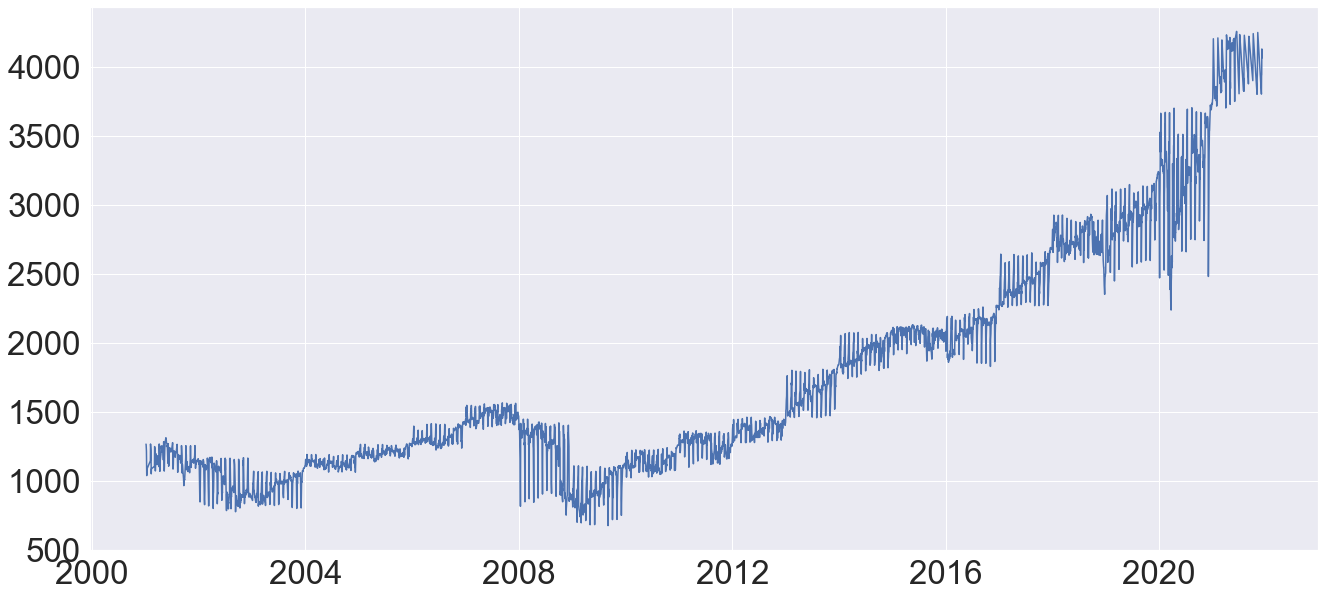

In [266]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 10))
# sns.set(font_scale=1.4)
plt.grid(True) 
plt.plot(df0['Fecha'], df0['Cierre_aj'])
plt.show()

# Como se puede ver el valor de cierre ajustado del índice tiene una variabilidad bastante alta en periodos
# cortos.

# el período de mayor volatilidad es precisamente el más reciente, que coincide con la subida de tipos de
# rentabilidad en deuda y bonos a largo plazo.

# Los tipos de interés llevan años en niveles muy bajos, y la pandemia del Covid-19 los ha hecho bajar 
# aún más, ya que los bancos centrales se han volcado en apoyar la actividad económica.

# este movimiento por parte de la FED es una estrategia para incentivar la liquidez en la economía,
# provocando la huida de la inversión de la renta variable y por tanto generando más volatilidad,
# ya que la huida masiva de capital atrae a la vez inversiones oportunistas.

In [ ]:
# convertimos la fecha a índice
df0.index=df0["Fecha"]
df0=df0.drop("Fecha", axis=1)

In [288]:
# Gráfico de vela

import plotly.graph_objects as go
from datetime import datetime

df1=df0[df0.index > datetime(year=2012, month=1, day=1)]
fig = go.Figure(data=[go.Candlestick(x=df1.index,
                open=df1['Apertura'],
                high=df1['Max'],
                low=df1['Min'],
                close=df1['Cierre'])])

fig.show()

Acotando el gráfico de vela a la evolución desde 2012 (periodo de inicio de recuperación de la crisis anterior), se puede ver que el valor del índice ha subido con una tendencia ligeramente estable hasta 2018, periodo en que a pesar de que el valor ha continuado subiendo, las subidas y bajadas del índice han sido más bruscas.
También es el período que coincide con el inicio de la guerra comercial de EEUU con China.

In [278]:
#se crean columnas auxiliares para detectar esa tendencia:


# 9) The ratio between the average volume for the past five days, and the average volume for the past year.

df0['p_mediana_5'] = df0['Cierre_aj'].rolling(window=5).median()
df0['p_mediana_30'] = df0['Cierre_aj'].rolling(window=30).median()
df0['VIX_mediana_5'] = df0['Cierre_aj_VIX'].rolling(window=5).median()
df0['VIX_mediana_30'] = df0['Cierre_aj_VIX'].rolling(window=30).median()

# Precio medio de los últimos 5 y 30 días del SP500 y del VIX
# 1 
df0['p_medio_5'] = df0['Cierre_aj'].rolling(window=5).mean()
df0['p_medio_30'] = df0['Cierre_aj'].rolling(window=30).mean()
df0['p_medio_365'] = df0['Cierre_aj'].rolling(window=365).mean()

df0['v_medio_5'] = df0['Volumen'].rolling(window=5).mean()
df0['v_medio_30'] = df0['Volumen'].rolling(window=30).mean()

df0['VIX_medio_5'] = df0['Cierre_aj_VIX'].rolling(window=5).mean()
df0['VIX_medio_30'] = df0['Cierre_aj_VIX'].rolling(window=30).mean()


# Desviación estándar de los últimos 5, 30 y 365 días
# 2
df0['dv_media_5'] = df0['Cierre_aj'].rolling(window=5).std()
df0['dv_media_30'] = df0['Cierre_aj'].rolling(window=30).std()

df0['dv_VIX_media_5'] = df0['Cierre_aj_VIX'].rolling(window=5).std()
df0['dv_VIX_media_30'] = df0['Cierre_aj_VIX'].rolling(window=30).std()

# 3
# df0['avg_price_5_365'] = sphist['avg_price_5'] / sphist['avg_price_365']

# Para ver también la evolución relativa de las medias móviles del índice (y de sus desviaciones), 
# añadimos dos columnas más con el ratio de la media de los últimos 5 días entre la de los últimos 
# 30 días; y el ratio de la desviación de los últimos 5 días con la de los últimos 30
df0['pm5/pm30']=df0['dv_media_5']/df0['dv_media_30']
df0['dv5/dv30']=df0['dv_media_5']/df0['dv_media_30']

# con estos ratios ficticios conseguimos obtener la importancia relativa del cambio de tendencia en cada
# horizonte temporal: conocemos el impacto del cambio en el precio o desviación media para cada
# período

df0['VIXm5/VIXm30']=df0['dv_VIX_media_5']/df0['dv_VIX_media_30']
df0['VIXd5/VIXd30']=df0['dv_VIX_media_5']/df0['dv_VIX_media_30']

# Añadimos también el máximo y mínimo de los últimos 30 y 365 días (para el sp500 y el VIX):
df0['p_max_365'] = df0['Cierre_aj'].rolling(window=365).max()
df0['p_max_30'] = df0['Cierre_aj'].rolling(window=30).max()

df0['p_min_365'] = df0['Cierre_aj'].rolling(window=365).min()
df0['p_min_30'] = df0['Cierre_aj'].rolling(window=30).min()

df0['VIX_max_365'] = df0['Cierre_aj_VIX'].rolling(window=365).max()
df0['VIX_max_30'] = df0['Cierre_aj_VIX'].rolling(window=30).max()

df0['VIX_min_365'] = df0['Cierre_aj_VIX'].rolling(window=365).min()
df0['VIX_min_30'] = df0['Cierre_aj_VIX'].rolling(window=30).min()

In [289]:
df0

,Apertura,Max,Min,Cierre,Cierre_aj,Volumen,Apertura_VIX,Max_VIX,Min_VIX,Cierre_VIX,...,VIXm5/VIXm30,VIXd5/VIXd30,p_max_365,p_max_30,p_min_365,p_min_30,VIX_max_365,VIX_max_30,VIX_min_365,VIX_min_30
Fecha,,,,,,,,,,,,,,,,,,,,,
2001-01-05,1249.46,1266.47,1243.55,1266.44,1266.44,1.181300e+09,25.46,25.57,24.16,24.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-06,1255.82,1265.34,1246.88,1260.67,1260.67,1.015000e+09,23.02,23.12,21.52,21.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,1211.23,1223.04,1211.23,1215.93,1215.93,1.340300e+09,20.97,20.99,20.13,20.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-10,1040.94,1040.94,1026.76,1038.55,1038.55,1.175600e+09,33.42,34.08,32.29,32.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-11,1059.78,1085.61,1054.31,1084.10,1084.10,1.317400e+09,33.97,34.57,32.00,32.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,3801.62,3810.78,3776.51,3801.19,3801.19,4.977210e+09,23.49,25.15,22.83,23.33,...,0.973953,0.973953,4255.15,4255.15,2237.4,3748.14,82.69,25.47,12.1,15.65
2021-12-02,3911.65,3937.23,3905.78,3934.83,3934.83,4.119260e+09,21.60,22.45,19.95,19.97,...,0.993449,0.993449,4255.15,4255.15,2237.4,3748.14,82.69,25.47,12.1,15.65
2021-12-03,3924.52,3944.99,3915.21,3943.34,3943.34,4.469240e+09,22.57,22.99,20.63,20.69,...,1.016552,1.016552,4255.15,4255.15,2237.4,3799.61,82.69,25.47,12.1,15.65


In [290]:
# meter retraso en max, min, vol, cierre para sp500 y vix. función: df['Apertura'].shift(1)
# habría que crear 365 columnas para cada columna (t-1), y aplicar PCA

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
datos = scaler.fit_transform(df0)
df_t=pd.DataFrame(datos, index=df0.index)
df_t.columns=df0.columns
df_t

,Apertura,Max,Min,Cierre,Cierre_aj,Volumen,Apertura_VIX,Max_VIX,Min_VIX,Cierre_VIX,...,VIXm5/VIXm30,VIXd5/VIXd30,p_max_365,p_max_30,p_min_365,p_min_30,VIX_max_365,VIX_max_30,VIX_min_365,VIX_min_30
Fecha,,,,,,,,,,,,,,,,,,,,,
2001-01-05,0.159446,0.160364,0.161487,0.164843,0.164843,0.074344,0.223263,0.202693,0.242991,0.204759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-06,0.161225,0.160047,0.162419,0.163231,0.163231,0.059362,0.190147,0.172152,0.201869,0.169273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,0.148756,0.148171,0.152438,0.150728,0.150728,0.088668,0.162324,0.145600,0.180218,0.155269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-10,0.101135,0.097047,0.100788,0.101162,0.101162,0.073830,0.331298,0.308776,0.369626,0.315160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-11,0.106404,0.109588,0.108502,0.113890,0.113890,0.086605,0.338762,0.314884,0.365109,0.315024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,0.873138,0.874679,0.870690,0.873147,0.873147,0.416313,0.196526,0.197457,0.222274,0.192930,...,0.407827,0.407827,1.0,1.0,0.932102,0.983519,1.0,0.187100,0.342197,0.413071
2021-12-02,0.903907,0.910180,0.906884,0.910491,0.910491,0.339021,0.170874,0.163800,0.177414,0.147247,...,0.416098,0.416098,1.0,1.0,0.932102,0.983519,1.0,0.187100,0.342197,0.413071
2021-12-03,0.907506,0.912358,0.909524,0.912869,0.912869,0.370551,0.184039,0.170531,0.188006,0.157036,...,0.425900,0.425900,1.0,1.0,0.932102,1.000000,1.0,0.187100,0.342197,0.413071


In [291]:
# Se hace el escalador del cierre ajustado aparte para hacer la transformada inversa después

scaler_y = MinMaxScaler()
datos_y = scaler_y.fit_transform(np.array(df0["Cierre_aj"]).reshape(-1, 1))

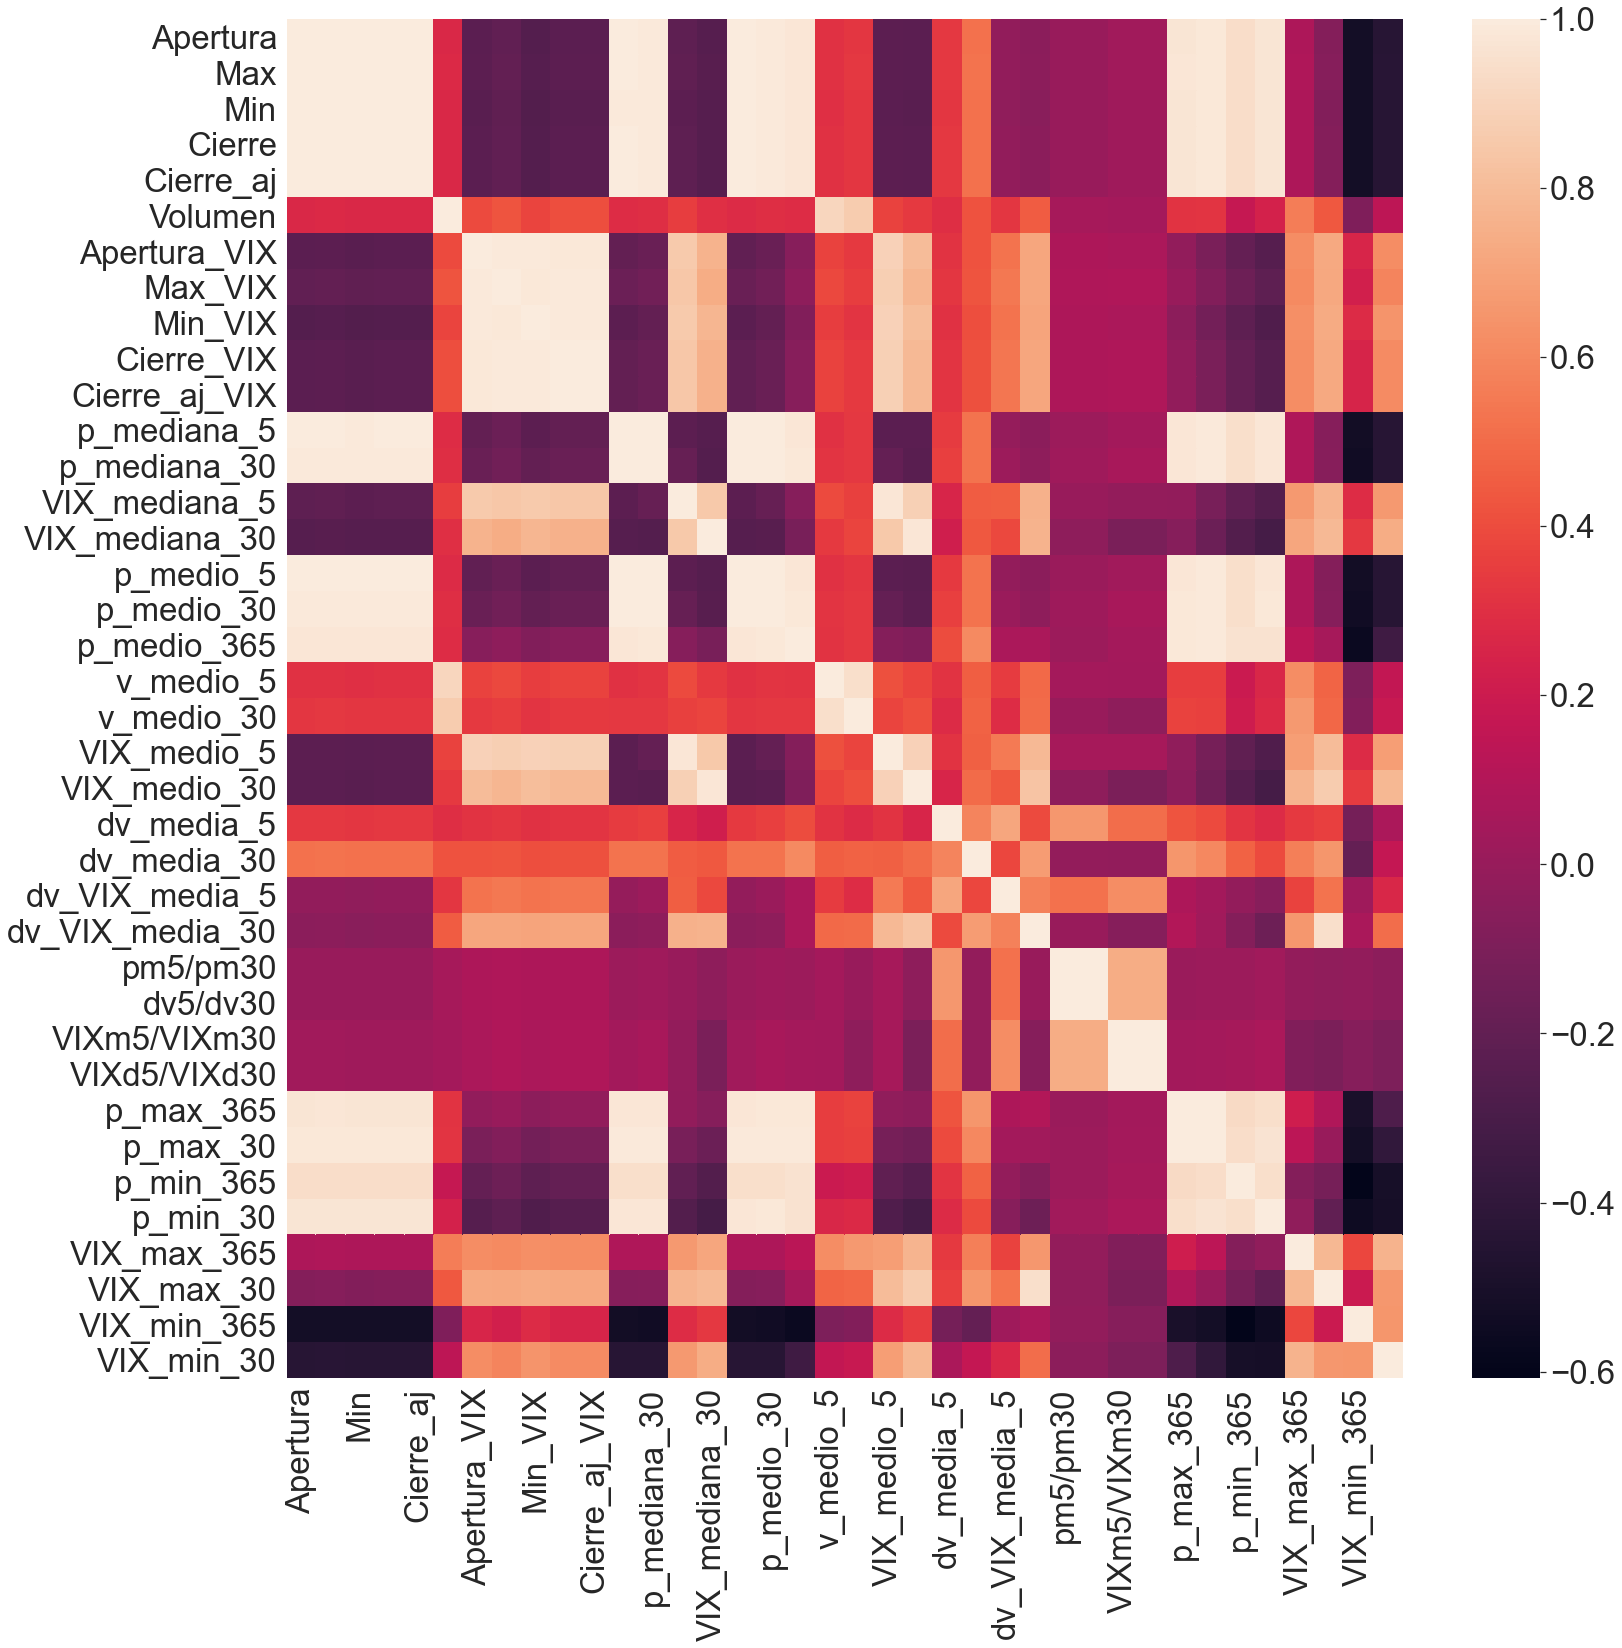

In [292]:
# Hacemos primero una matriz de correlación para fijarnos en las variables que puedan tener una influencia
# más directa en el cierre ajustado

import seaborn as sns

# Matriz de correlación
plt.figure(figsize=(25, 25))
sns.set(font_scale=3)
sns.heatmap(df0.corr())
plt.show()

# Presenta correlación negativa con el índice VIX, bastante alta para el valor medio de su mínimo
# en los últimos 30 y 365 días.
# Además se ve una correlación muy alta (0.6 aprox.) con la desviación media de los últimos 30 días.

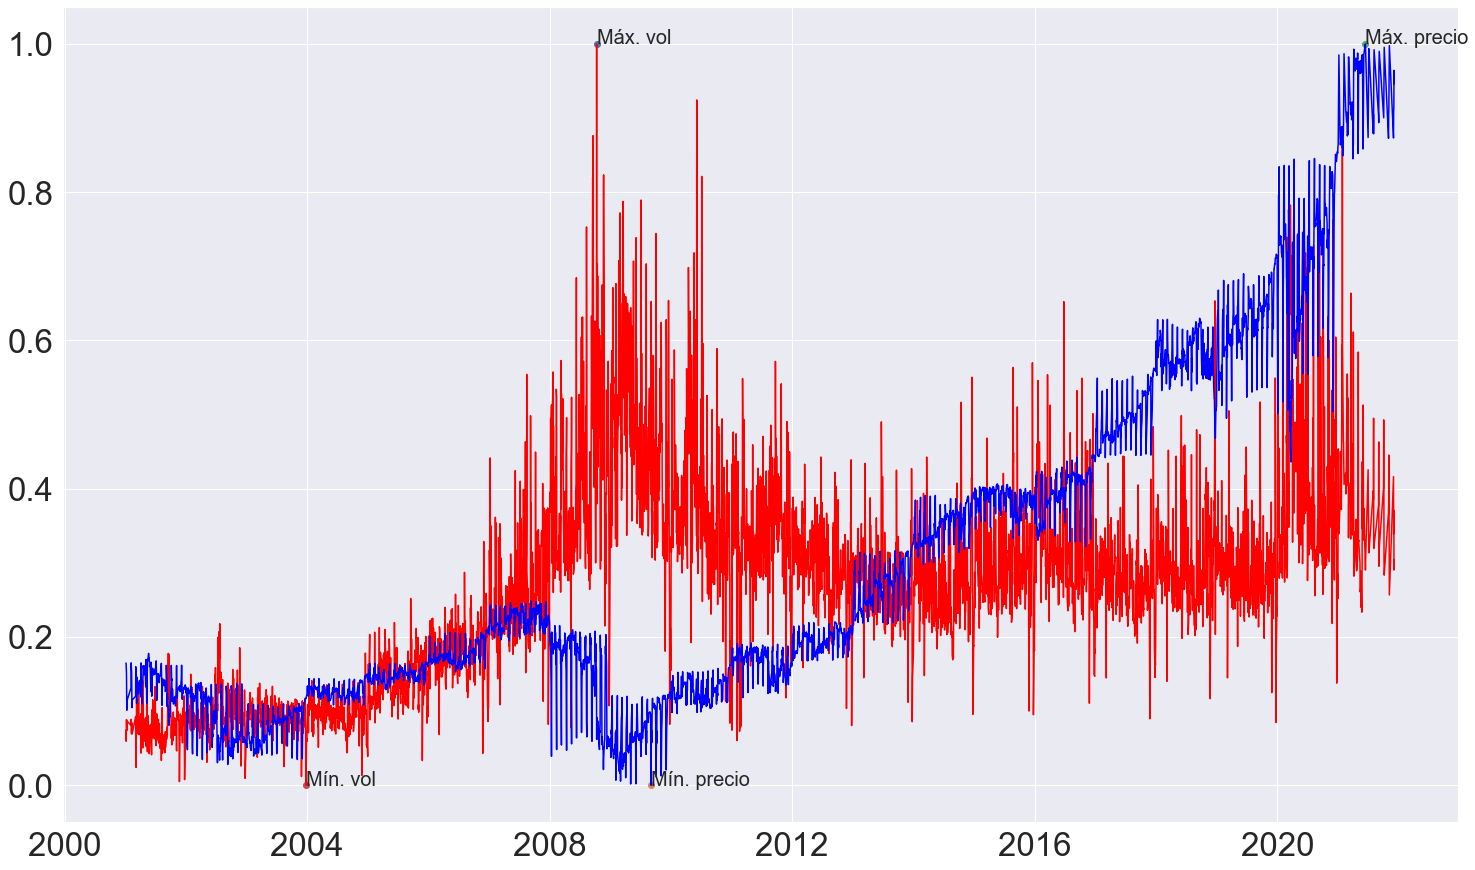

In [34]:
# Escalando el Dataframe anterior podemos comparar en términos relativos la relación entre el volumen de 
# compra-venta frente a variaciones en el precio

plt.figure(figsize=(25, 15))
plt.grid(True) 
plt.plot(df0.index, df_t['Volumen'], color="red")
plt.plot(df0.index, df_t['Cierre_aj'], color="blue")


# Puntos máximos y mínimos
plt.scatter(df_t[df_t["Volumen"]==df_t['Volumen'].max()].index[0], 1.0, label="ss")
plt.annotate("Máx. vol", (df_t[df_t["Volumen"]==df_t['Volumen'].max()].index[0], 1.0), size=20)

plt.scatter(df_t[df_t["Cierre_aj"]==df_t['Cierre_aj'].min()].index[0], 0.0, label="ss")
plt.annotate("Mín. precio", (df_t[df_t["Cierre_aj"]==df_t['Cierre_aj'].min()].index[0], 0.0), size=20)

plt.scatter(df_t[df_t["Cierre_aj"]==df_t['Cierre_aj'].max()].index[0], 1.0, label="ss")
plt.annotate("Máx. precio", (df_t[df_t["Cierre_aj"]==df_t['Cierre_aj'].max()].index[0], 1.0), size=20)

plt.scatter(df_t[df_t["Volumen"]==df_t['Volumen'].min()].index[0], 0.0, label="ss")
plt.annotate("Mín. vol", (df_t[df_t["Volumen"]==df_t['Volumen'].min()].index[0], 0.0), size=20)
plt.show()



- Entre el 2000 y el 2008 los valores del índice fluctúan de manera relativamente estable

- A partir de la crisis financiera de 2008 la cantidad de movimientos en el índice se multiplica
exponencialmente, es el período en los ultimos 20 años con mayor volumen de actividad.
crece mucho la desviación y volatilidad, y baja el valor del índice al mínimo

- Las crisis financieras dan lugar a incertidumbre respecto a valores futuros y promueven una búsqueda
colectiva de liquidez por inversores y empresas. De esta forma podrán afrontar mejor deudas
y otros contratiempos.

- A partir de 2012, la media del volumen de actividad se estabiliza, pero la desviación en esa misma característica pasa a ser más cambiante. De forma relativamente estable y hasta ahora, el valor del índice va subiendo. A partir de ese año, EEUU pasa a invertir mucho más en empresas de alta tecnología y en su desarrollo, lo que favorece la inversión, pero desde 2018 la volatilidad ha crecido mucho (por lo comentado previamente además de la guerra comercial con China), generando más incertidumbre en el valor del índice a largo plazo.


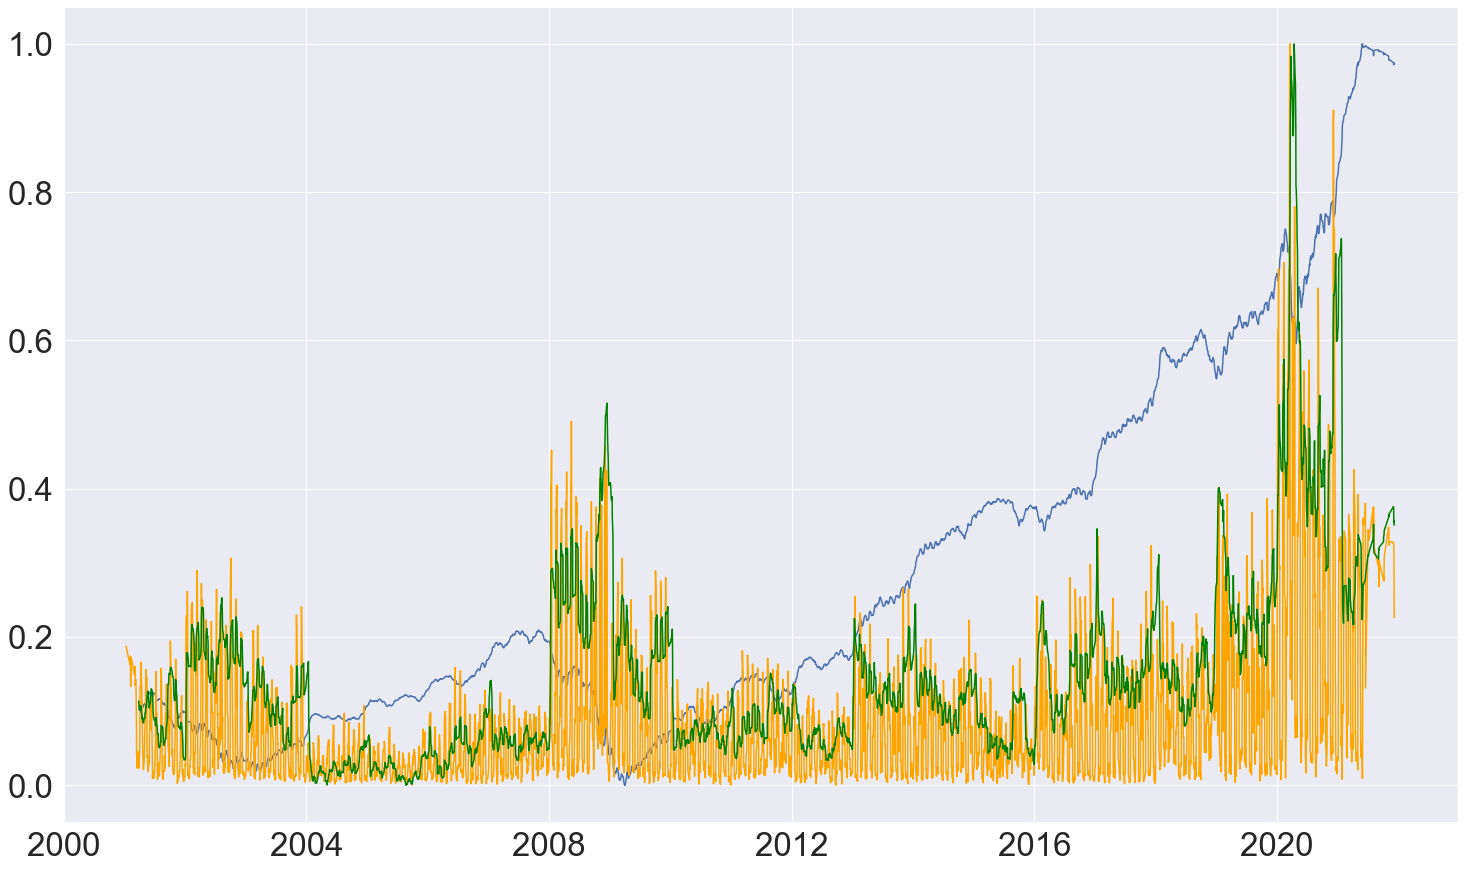

In [36]:
plt.figure(figsize=(25, 15))
plt.grid(True) 
# plt.plot(df0.index, df_t['p_medio_5'])
plt.plot(df0.index, df_t['p_medio_30'])
# plt.plot(df0.index, df_t['dv_media_5'])
plt.plot(df0.index, df_t['dv_media_5'], color="orange")
plt.plot(df0.index, df_t['dv_media_30'], color="green")
plt.show()


En este último gráfico (también con datos escalados) se puede ver mejor lo comentado anteriormente, también en términos relativos entre el precio y su desviación.

Se muestra tanto la desviación estándar de los últimos 5 días (naranja) como la de los últimos 30 (verde). De esta forma se puede ver mejor su variabilidad media en periodos más largos de tiempo y entender las tendencias que se explicaban anteriormente:

- La crisis financiera de 2008 trajo un período de fuertes desviaciones en el precio, y un aumento en volumen de transacciones.

- Sin embargo la nueva crisis por la subida de tipos de interés, la incertidumbre respecto a cuánto tiempo mantendrá la FED estos tipos y la volatilidad actual de las criptomonedas (sumada la actividad de sus ETF en bolsa), ha provocado que este último período sea el que también tiene vinculado la mayor desviación de precios de los últimos 20 años.

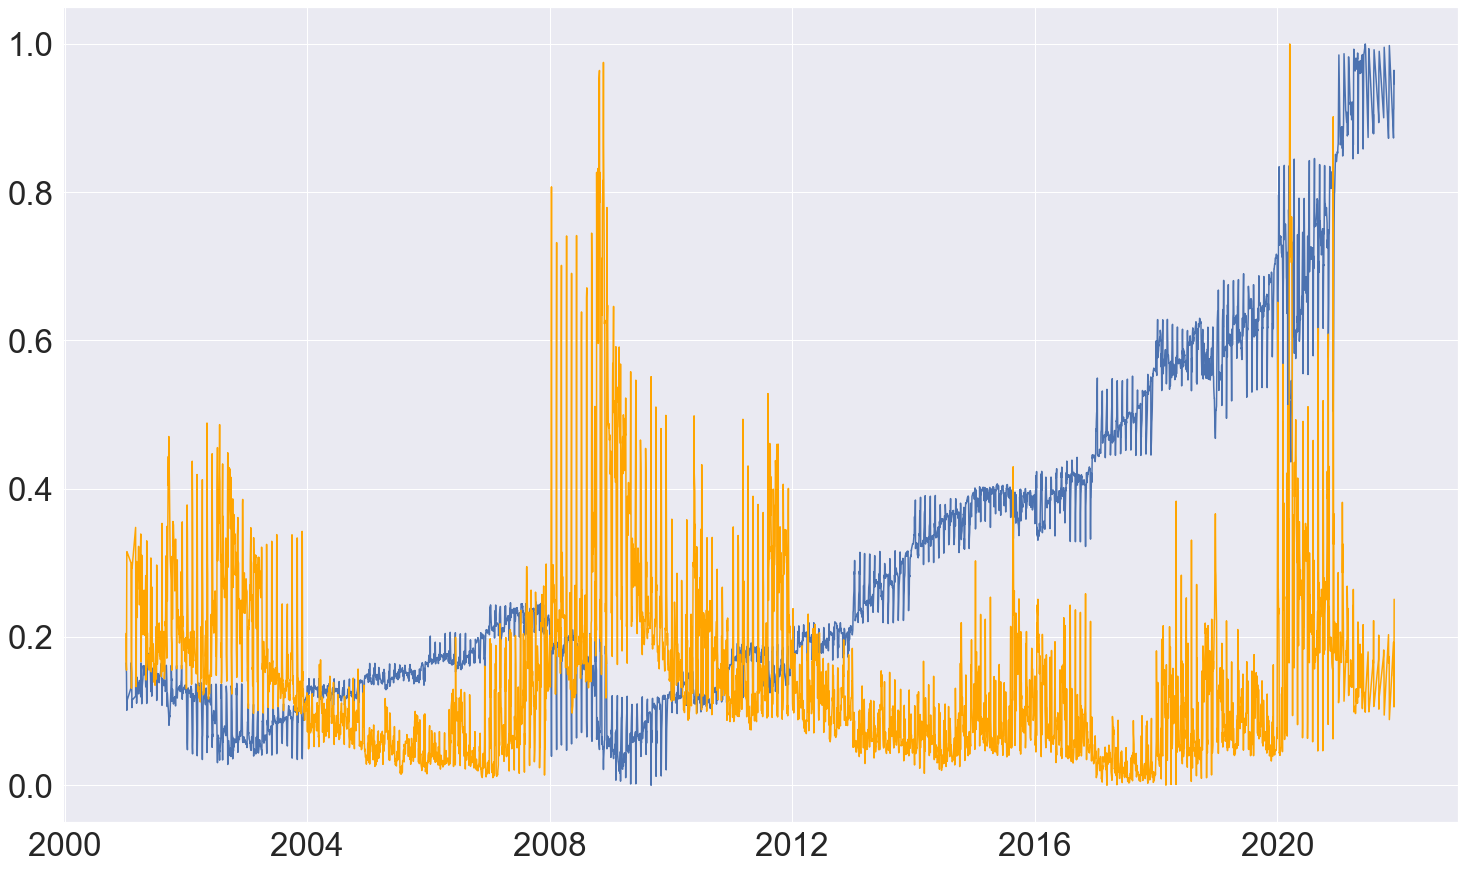

In [39]:
plt.figure(figsize=(25, 15))
plt.grid(True) 
# plt.plot(df0.index, df_t['p_medio_5'])
plt.plot(df0.index, df_t['Cierre_aj'])
# plt.plot(df0.index, df_t['dv_media_5'])
plt.plot(df0.index, df_t['Cierre_aj_VIX'], color="orange")
# plt.plot(df0.index, df_t['dv_media_30'], color="green")
plt.show()

Aquí se puede ver con más detalle la relación estudiada entre el índice de volatilidad VIX y el SP500. Hay una evidente correlación negativa entre ambos, ya que el índice VIX manifiesta valores más altos en momentos de incertidumbre económica y como se ve en el histórico, llega a sus valores más altos en la crisis hipotecaria y en la actual de tipos de interés.

Aunque el SP500 no ha vivido una caída fuerte como la de 2008-2010, está en el período con mayor desviación-volatilidad de su historia, lo que se ve reflejado en el valor del VIX.

Su valor se ha visto muy reducido en el último año, pero la alta variabilidad del SP500 muestra que aún es pronto para asegurar que este período ha acabado

Aplicación del modelo
-

Regresión multilineal

In [294]:
# Es importante excluir del dataframe los valores de Apertura, cierre, máximo y mínimo, ya que son valores
# que no tendríamos para el día de hoy para calcular el futuro

df0=df0.drop(["Apertura", "Max", "Min", "Cierre", "Volumen"], axis=1)

In [499]:
from datetime import datetime

# Separación del dataframe en train y test. Cogemos directamente el df sin escalar. 
X_train = df0[df0.index < datetime(year=2020, month=1, day=1)]
y_train = X_train["Cierre_aj"]
X_train = X_train.drop("Cierre_aj",axis=1)

X_test = df0[df0.index >= datetime(year=2020, month=1, day=1)]
y_test = X_test["Cierre_aj"]
X_test = X_test.drop("Cierre_aj",axis=1)


In [500]:
X_train

,Apertura_VIX,Max_VIX,Min_VIX,Cierre_VIX,Cierre_aj_VIX,p_mediana_5,p_mediana_30,VIX_mediana_5,VIX_mediana_30,p_medio_5,...,VIXm5/VIXm30,VIXd5/VIXd30,p_max_365,p_max_30,p_min_365,p_min_30,VIX_max_365,VIX_max_30,VIX_min_365,VIX_min_30
Fecha,,,,,,,,,,,,,,,,,,,,,
2002-08-27,29.89,30.80,29.53,30.11,30.11,947.95,924.195,29.32,30.000,947.138,...,0.155859,0.155859,1312.83,1164.31,785.28,797.70,45.08,44.92,17.40,19.27
2002-08-28,31.24,33.60,31.19,33.32,33.32,940.86,924.195,29.89,30.000,940.840,...,0.308261,0.308261,1312.83,1164.31,785.28,797.70,45.08,44.92,17.40,19.27
2002-08-29,35.42,35.42,33.21,33.67,33.67,934.82,924.195,30.11,30.000,931.860,...,0.318072,0.318072,1312.83,1164.31,785.28,797.70,45.08,44.92,17.40,19.27
2002-08-30,33.64,33.64,31.93,32.64,32.64,917.87,924.195,32.64,30.000,926.902,...,0.291637,0.291637,1312.83,1164.31,785.28,797.70,45.08,44.92,17.40,19.27
2002-09-01,21.30,22.42,20.66,22.13,22.13,917.87,929.510,32.64,29.740,968.340,...,0.836339,0.836339,1312.83,1164.31,785.28,798.55,45.08,41.02,17.40,19.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,12.65,12.84,12.56,12.67,12.67,3221.22,3121.245,12.58,12.625,3213.024,...,0.038937,0.038937,3224.01,3224.01,2351.10,2744.73,36.07,21.09,9.52,11.54
2019-12-26,12.74,12.75,11.72,12.65,12.65,3223.38,3121.245,12.61,12.625,3222.778,...,0.044016,0.044016,3239.91,3239.91,2351.10,2744.73,36.07,21.09,9.52,11.54
2019-12-27,12.61,13.72,11.89,13.43,13.43,3224.01,3127.835,12.65,12.625,3229.708,...,0.207450,0.207450,3240.02,3240.02,2351.10,2744.73,36.07,21.09,9.52,11.54


In [313]:
# Entrenamos el modelo con las columnas con las que hemos visto mayor correlación directa con el cierre ajustado
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
columnas = ["p_medio_5", "p_medio_30", "p_mediana_5", "p_mediana_30", "p_medio_365", "p_min_30","p_max_30", "p_max_365", "p_min_365", "dv_media_5", "dv_media_30", "VIX_min_365", "VIX_min_30"]

model1.fit(X_train[columnas], y_train)

LinearRegression()

In [314]:
def SMAPE (forecast, actual):
    """Returns the Symmetric Mean Absolute Percentage Error between two Series"""
    masked_arr = ~((forecast==0)&(actual==0))
    diff = abs(forecast[masked_arr] - actual[masked_arr])
    avg = (abs(forecast[masked_arr]) + abs(actual[masked_arr]))/2
    print('SMAPE Error Score: ' + str(round(sum(diff/avg)/len(forecast) * 100, 2)) + ' %')
    return sum(diff/avg)/len(forecast) * 100


In [315]:
# Se determinan predicciones y buscamos el error medio absoluto en porcentaje
# definir función SMAPE
yhat = model1.predict(X_test[columnas])

from sklearn.metrics import mean_absolute_error
#SMAPE=....................
error = SMAPE(yhat.reshape(1,-1)[0], y_test.values)
print(error)
print(y_test.mean())

SMAPE Error Score: 3.84 %
3.835072190590685
3463.121607629428


El porcentaje de error en el SMAPE está en torno al 3,84%. El error no es alta y se aproxima a la tendencia, el único problema es que la tendencia del precio incluye cambios muy bruscos en períodos de tiempo cortos. Lo que serían outliers, pero en este modelo marcan la diferencia entre vender o comprar.

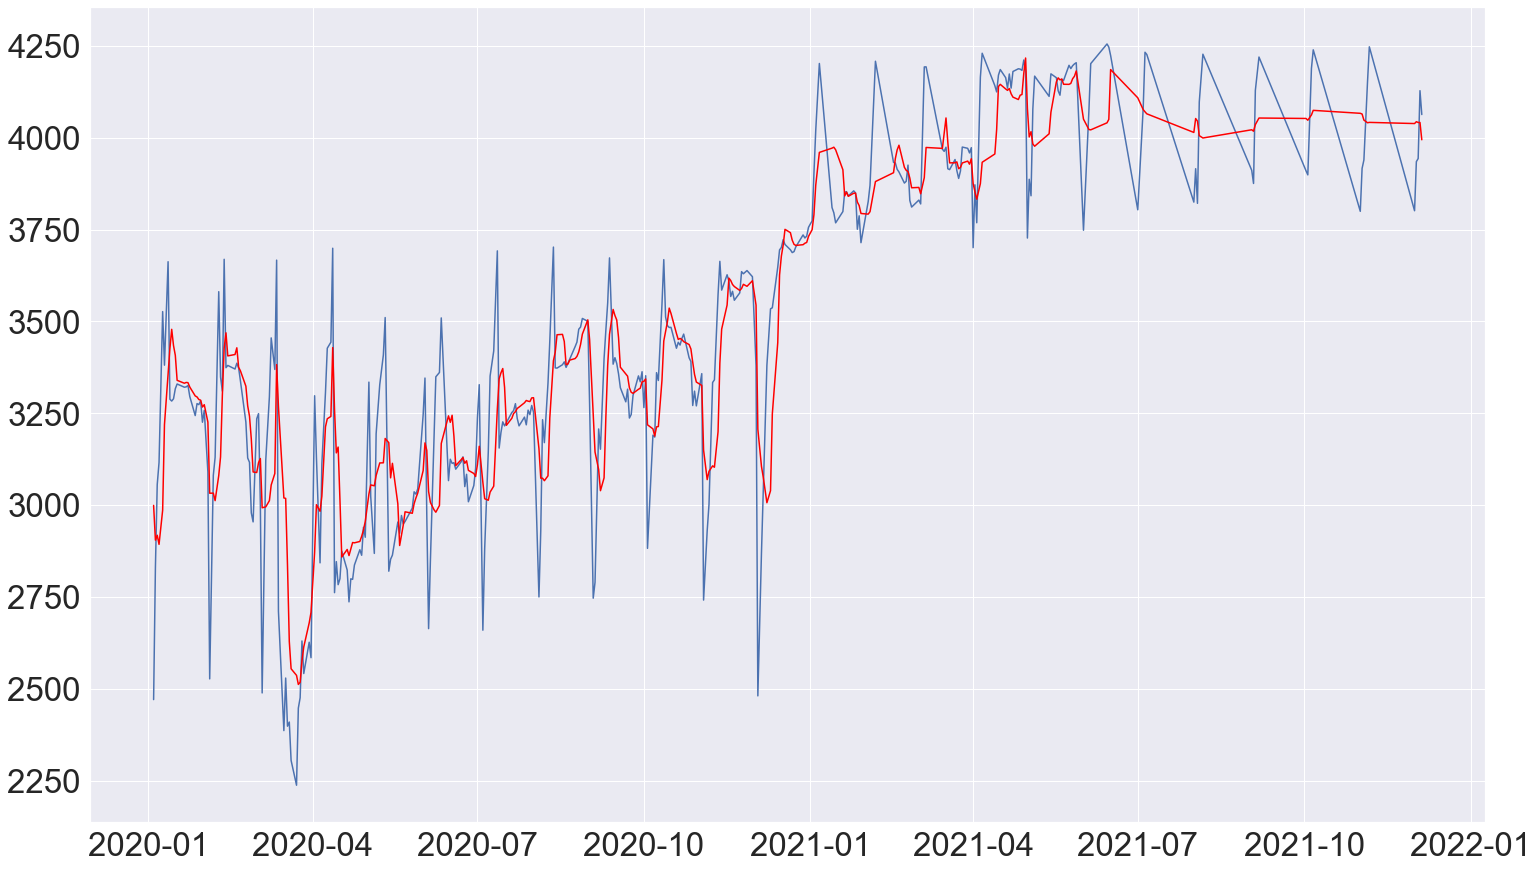

In [317]:
plt.figure(figsize=(25, 15))
plt.grid(True) 
plt.plot(X_test.index, y_test)
plt.plot(X_test.index, yhat, color="red")

In [637]:
X_train.shape

(4368, 32)

In [639]:
# xgboostregressor
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

model0 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1)

# evaluate model
scores = cross_val_score(model0, X_train, y_train, scoring='neg_mean_absolute_error', n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

model0.fit(X_train, y_train)
yhat = model0.predict(X_test)
error = SMAPE(yhat.reshape(1,-1)[0], y_test.values)
print(error)
print(y_test.mean())

Mean MAE: 142.326 (201.748)
SMAPE Error Score: 18.73 %
18.727006646916703
3463.121607629428


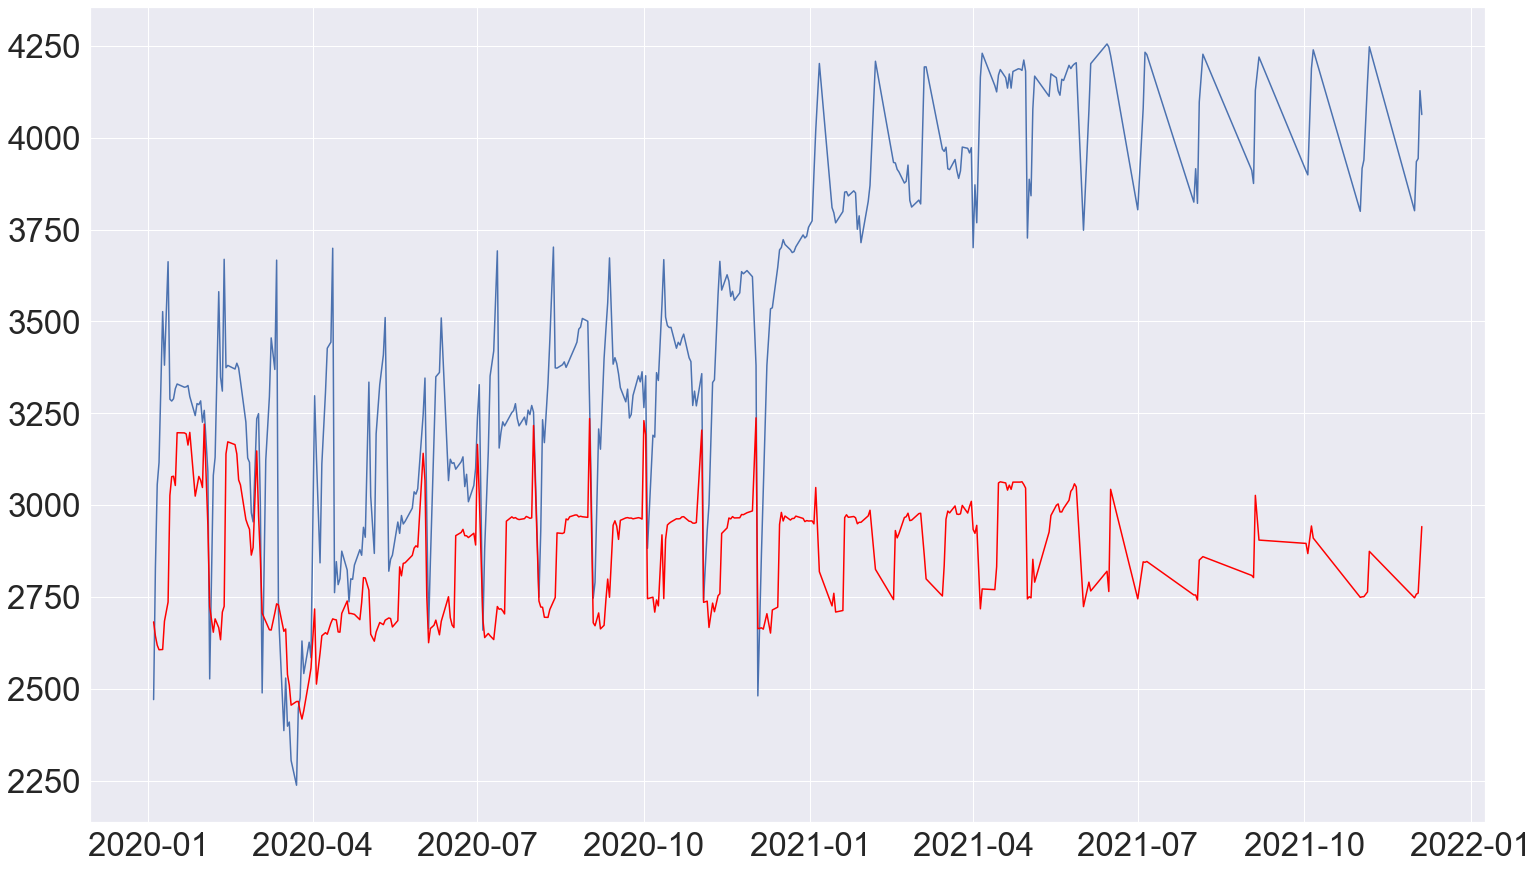

In [640]:
plt.figure(figsize=(25, 15))
plt.grid(True) 
plt.plot(X_test.index, y_test)
plt.plot(X_test.index, yhat, color="red")

Se deja como modelo de prueba, necesario ajustar parámetros, las pruebas hasta ahora han dado resultados erróneos

In [356]:
df_t.dropna(inplace=True)

In [599]:
df_t_RNN=df_t[["Apertura","Min","Max","Volumen","Apertura_VIX","Max_VIX","Min_VIX","Cierre_aj", "Cierre_aj_VIX"]]

Redes neuronales recurrentes

In [348]:
# Función para mover un período atrás las variables:

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [600]:
# datos serían las columnas que queremos desfasar en el tiempo (0-365 días)

series = series_to_supervised(df_t_RNN, 5, 1)
series


,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var6(t-5),var7(t-5),var8(t-5),var9(t-5),var1(t-4),...,var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t)
Fecha,,,,,,,,,,,,,,,,,,,,,
2002-09-04,0.075131,0.073797,0.073149,0.085731,0.283388,0.267888,0.326636,0.072176,0.285112,0.071460,...,0.176615,0.124723,0.125979,0.121570,0.079218,0.139794,0.129893,0.167290,0.123307,0.140449
2002-09-05,0.071460,0.068995,0.067254,0.071218,0.301710,0.302792,0.352492,0.067439,0.328756,0.066720,...,0.140449,0.114533,0.113519,0.110498,0.071794,0.160559,0.153453,0.191121,0.110791,0.168865
2002-09-07,0.066720,0.066229,0.064382,0.082434,0.358442,0.325480,0.383956,0.067420,0.333515,0.066700,...,0.168865,0.083249,0.079775,0.079834,0.089443,0.257193,0.262154,0.299533,0.077209,0.286608
2002-09-08,0.066700,0.068144,0.065381,0.051696,0.334283,0.303291,0.364019,0.066936,0.319511,0.134628,...,0.286608,0.061367,0.062712,0.061394,0.084578,0.385451,0.351159,0.407009,0.064860,0.356084
2002-09-09,0.134628,0.135823,0.134476,0.098731,0.166802,0.163426,0.188474,0.133741,0.176615,0.124723,...,0.356084,0.060022,0.060514,0.059539,0.069776,0.408388,0.377961,0.428037,0.063273,0.371312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,0.873563,0.874192,0.876667,0.368862,0.194083,0.193219,0.228505,0.872705,0.203127,0.905235,...,0.088511,0.873138,0.870690,0.874679,0.416313,0.196526,0.197457,0.222274,0.873147,0.192930
2021-12-02,0.905235,0.902575,0.907024,0.379635,0.177524,0.173772,0.195483,0.905335,0.164650,0.904994,...,0.192930,0.903907,0.906884,0.910180,0.339021,0.170874,0.163800,0.177414,0.910491,0.147247
2021-12-03,0.904994,0.909617,0.916648,0.445394,0.183089,0.164423,0.200779,0.911751,0.173623,0.970654,...,0.147247,0.907506,0.909524,0.912358,0.370551,0.184039,0.170531,0.188006,0.912869,0.157036


In [601]:
series=series.drop(["var1(t)","var2(t)","var3(t)","var4(t)","var5(t)","var6(t)","var7(t)","var9(t)"], axis=1)

In [602]:
values = series.values
corte = 4369
train = values[:corte, :]
test = values[corte:, :]

#se coge la columna 2 porque es la de AdjClose, la 3 es de volumen
train_X, train_y = train[:, 0:-1], train[:, -1]
test_X, test_y = test[:, 0:-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print("train:",train_X.shape, train_y.shape, "test:",test_X.shape, test_y.shape)

train: (4369, 1, 45) (4369,) test: (361, 1, 45) (361,)


In [369]:
train_X.shape

(4369, 1, 9)

In [367]:
values.shape

(4734, 10)

In [394]:
train_X

array([[[0.07513143, 0.07379688, 0.07314937, ..., 0.32663551,
         0.07217587, 0.28511217]],

       [[0.07145973, 0.06899506, 0.06725362, ..., 0.35249221,
         0.0674394 , 0.32875595]],

       [[0.0667198 , 0.06622876, 0.06438155, ..., 0.38395639,
         0.06741984, 0.33351462]],

       ...,

       [[0.71611018, 0.71391213, 0.7146908 , ..., 0.07601246,
         0.71110093, 0.07722638]],

       [[0.7091443 , 0.71264097, 0.7121079 , ..., 0.08084112,
         0.71375279, 0.06308634]],

       [[0.50861298, 0.49857765, 0.51306469, ..., 0.68847352,
         0.50130218, 0.65152957]]])

In [603]:
# Para elegir el número de neuronas, lo normal es que en las primeras capas 
# debe cubrir al menos el tamaño de los datos de entrada. Nuestra entrada comprende valores para 100 
# fechas. Por lo tanto, la forma de entrada debe tener al menos 100 neuronas, una para cada valor. 
# En la última capa, tendremos solo 1 neurona, lo que significa que nuestra predicción contendrá un 
# único punto de precio para un solo paso de tiempo.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model2 = Sequential()

# 2 capas de 100 neuronas
model2.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dropout(0.2))
model2.add(LSTM(50, return_sequences=False))
# model.add(Dropout(0.2))
model2.add(Dense(50, activation='relu'))

model2.add(Dense(25, activation='relu'))
# model.add(Dropout(0.2))
model2.add(Dense(1))

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

In [604]:
history = model2.fit(train_X, train_y, epochs=30, validation_data=(test_X, test_y), verbose=1)

Epoch 1/30
137/137 [==============================] - 7s 12ms/step - loss: 0.0089 - val_loss: 0.0042
Epoch 2/30
137/137 [==============================] - 1s 5ms/step - loss: 4.3733e-04 - val_loss: 0.0040
Epoch 3/30
137/137 [==============================] - 1s 5ms/step - loss: 4.2858e-04 - val_loss: 0.0038
Epoch 4/30
137/137 [==============================] - 1s 5ms/step - loss: 4.0139e-04 - val_loss: 0.0036
Epoch 5/30
137/137 [==============================] - 1s 5ms/step - loss: 3.8953e-04 - val_loss: 0.0035
Epoch 6/30
137/137 [==============================] - 1s 5ms/step - loss: 3.7551e-04 - val_loss: 0.0037
Epoch 7/30
137/137 [==============================] - 1s 5ms/step - loss: 3.7656e-04 - val_loss: 0.0034
Epoch 8/30
137/137 [==============================] - 1s 5ms/step - loss: 3.6726e-04 - val_loss: 0.0035
Epoch 9/30
137/137 [==============================] - 1s 5ms/step - loss: 3.7019e-04 - val_loss: 0.0033
Epoch 10/30
137/137 [==============================] - 1s 5ms/step 

In [605]:
model2.evaluate(test_X, test_y)

12/12 [==============================] - 0s 2ms/step - loss: 0.0038


0.0037757602985948324

In [606]:
yhat=model2.predict(test_X)
# inv_yhat = np.concatenate((yhat, X_test[:, -(X_test.shape[-1]-1):]), axis=1)
inv_yhat = scaler_y.inverse_transform(yhat)
inv_y = scaler_y.inverse_transform(np.array([test_y]))

In [607]:
pd.DataFrame(inv_yhat, inv_y[0])

,0
3662.45,3383.255615
3288.13,3512.392334
3283.15,3336.169434
3289.29,3304.077148
3316.81,3239.629395
...,...
3801.19,3933.479736
3934.83,3801.380615
3943.34,3767.126465
4127.99,3766.920410


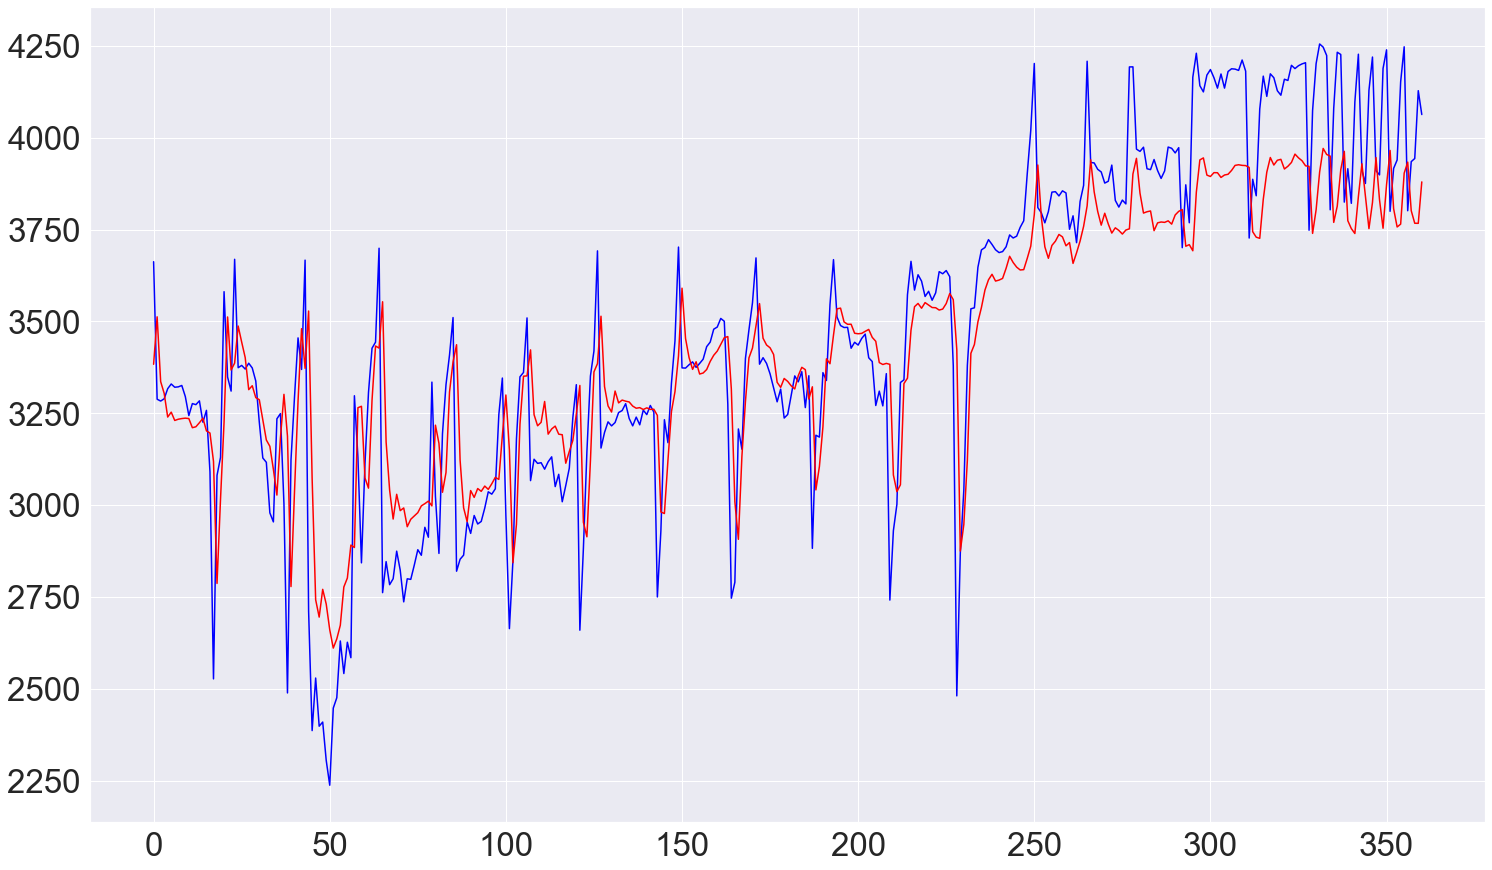

In [608]:
plt.figure(figsize=(25, 15))
plt.grid(True) 
plt.plot(range(len(inv_y[0])), inv_y[0],color="blue")
plt.plot(range(len(inv_yhat)), inv_yhat, color="red")

In [609]:
error = SMAPE(yhat.reshape(1,-1)[0], test_y)
print(error)
print(y_test.mean())

SMAPE Error Score: 6.11 %
6.110261041691618
3463.121607629428


In [610]:

model3 = Sequential()
model3.add(SimpleRNN(200, input_shape=(train_X.shape[1], train_X.shape[2])))
model3.add(Dense(64, activation="relu")) 
model3.add(Dense(32, activation="relu")) 
model3.add(Dense(16, activation="relu")) 
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_23 (SimpleRNN)    (None, 200)               49200     
_________________________________________________________________
dense_117 (Dense)            (None, 64)                12864     
_________________________________________________________________
dense_118 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_119 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_120 (Dense)            (None, 1)                 17        
Total params: 64,689
Trainable params: 64,689
Non-trainable params: 0
_________________________________________________________________


In [611]:
history = model3.fit(train_X, train_y, epochs=30, validation_data=(test_X, test_y), verbose=1)

Epoch 1/30
137/137 [==============================] - 2s 5ms/step - loss: 0.0030 - val_loss: 0.0041
Epoch 2/30
137/137 [==============================] - 0s 3ms/step - loss: 3.9528e-04 - val_loss: 0.0055
Epoch 3/30
137/137 [==============================] - 0s 3ms/step - loss: 4.0372e-04 - val_loss: 0.0046
Epoch 4/30
137/137 [==============================] - 0s 3ms/step - loss: 3.6764e-04 - val_loss: 0.0049
Epoch 5/30
137/137 [==============================] - 1s 4ms/step - loss: 3.5972e-04 - val_loss: 0.0035
Epoch 6/30
137/137 [==============================] - 0s 3ms/step - loss: 3.8476e-04 - val_loss: 0.0036
Epoch 7/30
137/137 [==============================] - 0s 3ms/step - loss: 3.5971e-04 - val_loss: 0.0047
Epoch 8/30
137/137 [==============================] - 0s 3ms/step - loss: 3.6976e-04 - val_loss: 0.0049
Epoch 9/30
137/137 [==============================] - 0s 4ms/step - loss: 3.4274e-04 - val_loss: 0.0039
Epoch 10/30
137/137 [==============================] - 1s 4ms/step -

In [612]:
model3.evaluate(test_X, test_y)

12/12 [==============================] - 0s 2ms/step - loss: 0.0031


0.0030702536460012197

In [613]:
yhat=model3.predict(test_X)
# inv_yhat = np.concatenate((yhat, X_test[:, -(X_test.shape[-1]-1):]), axis=1)
inv_yhat = scaler_y.inverse_transform(yhat)
inv_y = scaler_y.inverse_transform(np.array([test_y]))

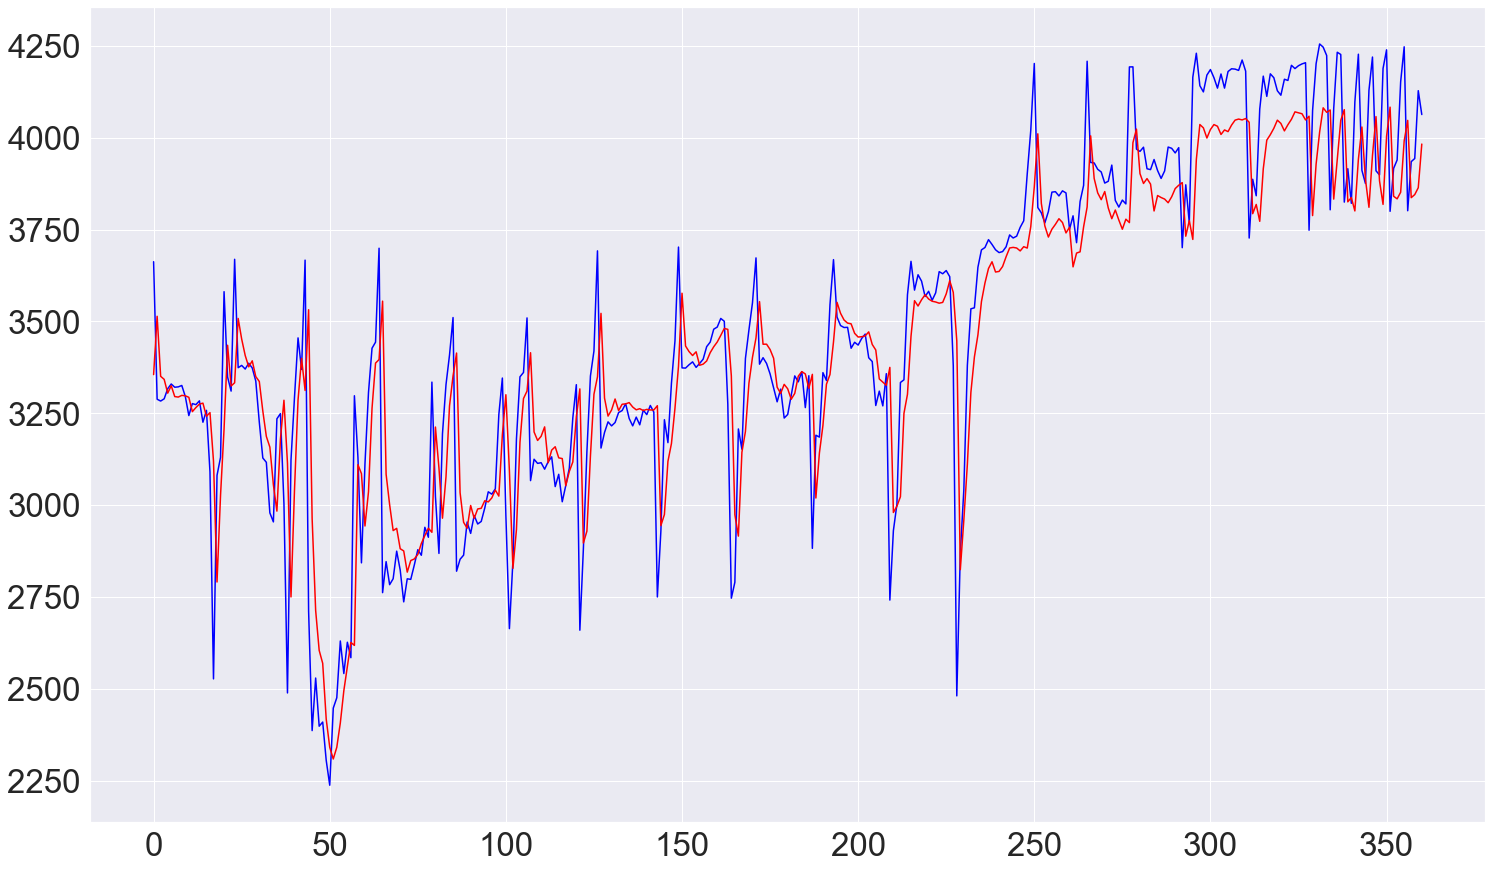

In [614]:
plt.figure(figsize=(25, 15))
plt.grid(True) 
plt.plot(range(len(inv_y[0])),inv_y[0],color="blue")
plt.plot(range(len(inv_yhat)), inv_yhat, color="red")

In [412]:
error = SMAPE(yhat.reshape(1,-1)[0], test_y)
print(error)
print(y_test.mean())

SMAPE Error Score: 5.19 %
5.189382083983318
3463.121607629428


In [616]:
df_t_RNN2=df_t[["Apertura","Min","Max","Volumen","Apertura_VIX","Max_VIX","Min_VIX", "Cierre_aj_VIX", "p_medio_5", "p_medio_30", "p_mediana_5", "p_mediana_30", "p_medio_365", "p_min_30","p_max_30", "p_max_365", "p_min_365", "dv_media_5", "dv_media_30", "VIX_min_365", "VIX_min_30", "Cierre_aj" ]]

In [444]:
df_t_RNN2.head()

,Apertura,Min,Max,Volumen,Apertura_VIX,Max_VIX,Min_VIX,Cierre_aj_VIX,p_medio_5,p_medio_30,...,p_medio_365,p_min_30,p_max_30,p_max_365,p_min_365,dv_media_5,dv_media_30,VIX_min_365,VIX_min_30,Cierre_aj
Fecha,,,,,,,,,,,,,,,,,,,,,
2002-08-27,0.075131,0.073797,0.073149,0.085731,0.283388,0.267888,0.326636,0.285112,0.056083,0.034818,...,0.062598,0.038798,0.034698,0.046834,0.064942,0.017477,0.195802,0.954913,0.642766,0.072176
2002-08-28,0.071460,0.068995,0.067254,0.071218,0.301710,0.302792,0.352492,0.328756,0.054255,0.035184,...,0.062219,0.038798,0.034698,0.046834,0.064942,0.028358,0.194718,0.954913,0.642766,0.067439
2002-08-29,0.066720,0.066229,0.064382,0.082434,0.358442,0.325480,0.383956,0.333515,0.051650,0.035890,...,0.061846,0.038798,0.034698,0.046834,0.064942,0.023134,0.191549,0.954913,0.642766,0.067420
2002-08-30,0.066700,0.068144,0.065381,0.051696,0.334283,0.303291,0.364019,0.319511,0.050211,0.036859,...,0.061520,0.038798,0.034698,0.046834,0.064942,0.023873,0.185714,0.954913,0.642766,0.066936
2002-09-01,0.134628,0.135823,0.134476,0.098731,0.166802,0.163426,0.188474,0.176615,0.062235,0.040459,...,0.061647,0.039070,0.034698,0.046834,0.064942,0.186949,0.193707,0.954913,0.642766,0.133741


In [625]:
# datos serían las columnas que queremos desfasar en el tiempo (0-365 días)

series = series_to_supervised(df_t_RNN2, 1, 1)
series

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var13(t),var14(t),var15(t),var16(t),var17(t),var18(t),var19(t),var20(t),var21(t),var22(t)
Fecha,,,,,,,,,,,,,,,,,,,,,
2002-08-28,0.075131,0.073797,0.073149,0.085731,0.283388,0.267888,0.326636,0.285112,0.056083,0.034818,...,0.062219,0.038798,0.034698,0.046834,0.064942,0.028358,0.194718,0.954913,0.642766,0.067439
2002-08-29,0.071460,0.068995,0.067254,0.071218,0.301710,0.302792,0.352492,0.328756,0.054255,0.035184,...,0.061846,0.038798,0.034698,0.046834,0.064942,0.023134,0.191549,0.954913,0.642766,0.067420
2002-08-30,0.066720,0.066229,0.064382,0.082434,0.358442,0.325480,0.383956,0.333515,0.051650,0.035890,...,0.061520,0.038798,0.034698,0.046834,0.064942,0.023873,0.185714,0.954913,0.642766,0.066936
2002-09-01,0.066700,0.068144,0.065381,0.051696,0.334283,0.303291,0.364019,0.319511,0.050211,0.036859,...,0.061647,0.039070,0.034698,0.046834,0.064942,0.186949,0.193707,0.954913,0.642766,0.133741
2002-09-04,0.134628,0.135823,0.134476,0.098731,0.166802,0.163426,0.188474,0.176615,0.062235,0.040459,...,0.061683,0.039070,0.034698,0.046834,0.064942,0.215897,0.198288,0.954913,0.642766,0.123307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,0.996538,0.998292,0.997535,0.256592,0.097313,0.085889,0.102648,0.088511,0.945094,0.978810,...,0.995308,0.983519,1.000000,1.000000,0.932102,0.327722,0.375982,0.342197,0.413071,0.873147
2021-12-02,0.873138,0.870690,0.874679,0.416313,0.196526,0.197457,0.222274,0.192930,0.945185,0.974784,...,0.996083,0.983519,1.000000,1.000000,0.932102,0.323730,0.372729,0.342197,0.413071,0.910491
2021-12-03,0.903907,0.906884,0.910180,0.339021,0.170874,0.163800,0.177414,0.147247,0.946256,0.972072,...,0.996858,1.000000,1.000000,1.000000,0.932102,0.322992,0.355186,0.342197,0.413071,0.912869


In [626]:
series=series.drop(["var1(t)","var2(t)","var3(t)","var4(t)","var5(t)","var6(t)","var7(t)","var9(t)"], axis=1)

In [627]:
values = series.values
corte = 4369
train = values[:corte, :]
test = values[corte:, :]

#se coge la columna 2 porque es la de AdjClose, la 3 es de volumen
train_X, train_y = train[:, 0:-1], train[:, -1]
test_X, test_y = test[:, 0:-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print("train:",train_X.shape, train_y.shape, "test:",test_X.shape, test_y.shape)

train: (4369, 1, 35) (4369,) test: (365, 1, 35) (365,)


In [628]:
model4 = Sequential()
model4.add(SimpleRNN(200, input_shape=(train_X.shape[1], train_X.shape[2])))
model4.add(Dense(64, activation="relu")) 
model4.add(Dense(32, activation="relu")) 
model4.add(Dense(16, activation="relu")) 
model4.add(Dense(1))
model4.compile(loss='mean_squared_error', optimizer='adam')
model4.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_26 (SimpleRNN)    (None, 200)               47200     
_________________________________________________________________
dense_129 (Dense)            (None, 64)                12864     
_________________________________________________________________
dense_130 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_131 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_132 (Dense)            (None, 1)                 17        
Total params: 62,689
Trainable params: 62,689
Non-trainable params: 0
_________________________________________________________________


In [629]:
history = model4.fit(train_X, train_y, epochs=30, validation_data=(test_X, test_y), verbose=1)

Epoch 1/30
137/137 [==============================] - 2s 4ms/step - loss: 0.0012 - val_loss: 0.0070
Epoch 2/30
137/137 [==============================] - 0s 3ms/step - loss: 2.3011e-04 - val_loss: 0.0075
Epoch 3/30
137/137 [==============================] - 0s 3ms/step - loss: 2.2296e-04 - val_loss: 0.0056
Epoch 4/30
137/137 [==============================] - 0s 3ms/step - loss: 2.0888e-04 - val_loss: 0.0030
Epoch 5/30
137/137 [==============================] - 0s 3ms/step - loss: 1.7999e-04 - val_loss: 0.0056
Epoch 6/30
137/137 [==============================] - 0s 3ms/step - loss: 1.7839e-04 - val_loss: 0.0036
Epoch 7/30
137/137 [==============================] - 0s 3ms/step - loss: 1.8297e-04 - val_loss: 0.0060
Epoch 8/30
137/137 [==============================] - 0s 3ms/step - loss: 1.8084e-04 - val_loss: 0.0047
Epoch 9/30
137/137 [==============================] - 0s 3ms/step - loss: 1.4867e-04 - val_loss: 0.0030
Epoch 10/30
137/137 [==============================] - 0s 3ms/step -

In [631]:
model4.evaluate(test_X, test_y)

12/12 [==============================] - 0s 2ms/step - loss: 0.0046


0.00463629188016057

In [632]:
yhat=model4.predict(test_X)
# inv_yhat = np.concatenate((yhat, X_test[:, -(X_test.shape[-1]-1):]), axis=1)
inv_yhat = scaler_y.inverse_transform(yhat)
inv_y = scaler_y.inverse_transform(np.array([test_y]))

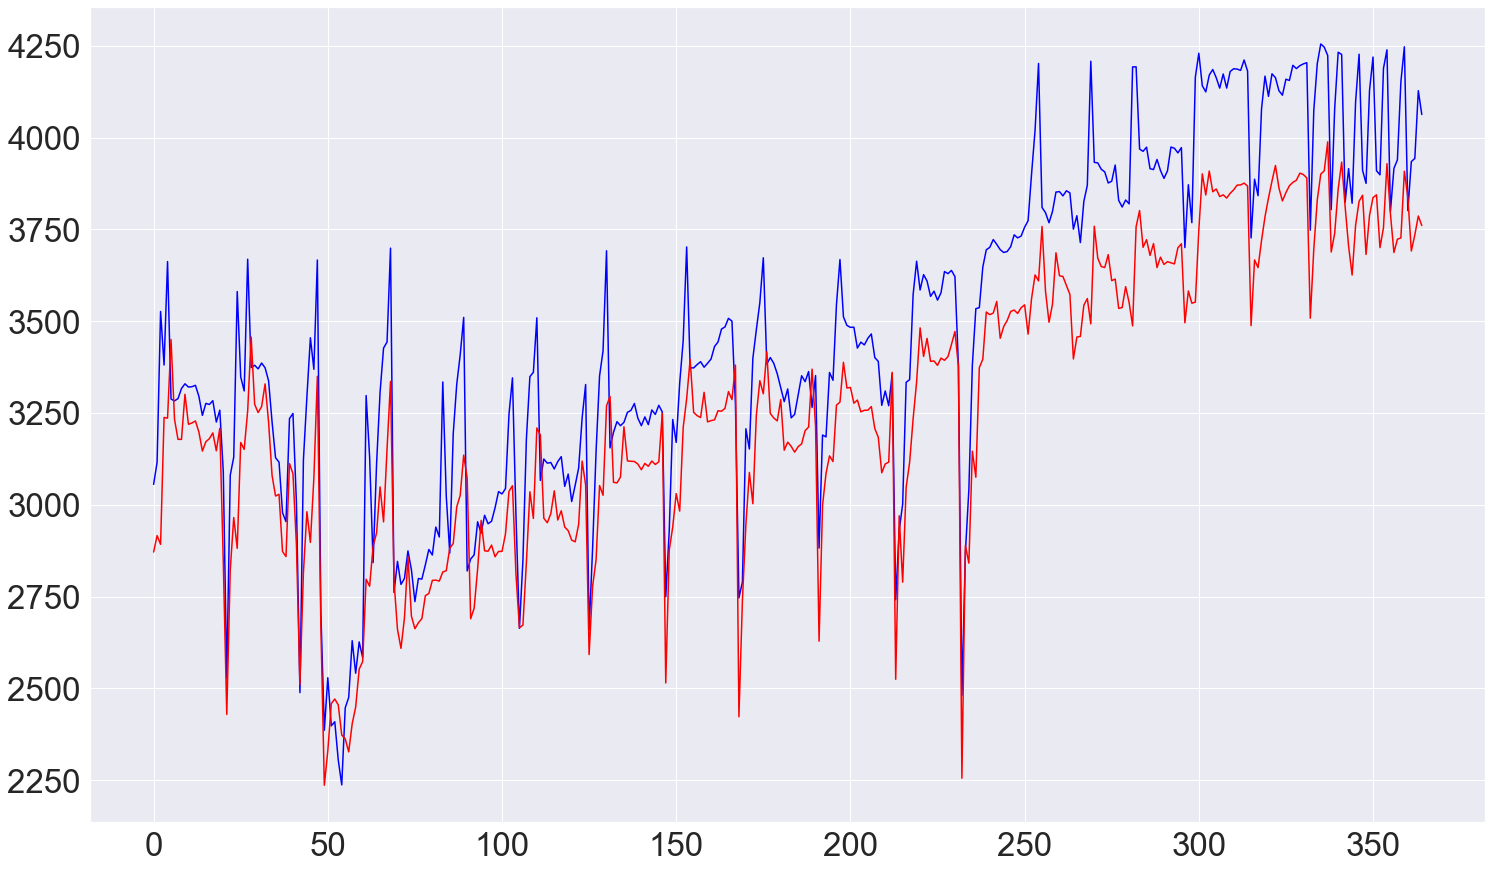

In [633]:
plt.figure(figsize=(25, 15))
plt.grid(True) 
plt.plot(range(len(inv_y[0])),inv_y[0],color="blue")
plt.plot(range(len(inv_yhat)), inv_yhat, color="red")

In [534]:
error = SMAPE(yhat.reshape(1,-1)[0], test_y)
print(error)
print(y_test.mean())

SMAPE Error Score: 4.96 %
4.961757390851251
3463.121607629428


In [635]:
df0.tail(50)

,Cierre_aj,Apertura_VIX,Max_VIX,Min_VIX,Cierre_VIX,Cierre_aj_VIX,p_mediana_5,p_mediana_30,VIX_mediana_5,VIX_mediana_30,...,VIXm5/VIXm30,VIXd5/VIXd30,p_max_365,p_max_30,p_min_365,p_min_30,VIX_max_365,VIX_max_30,VIX_min_365,VIX_min_30
Fecha,,,,,,,,,,,,,,,,,,,,,
2021-05-01,3726.86,26.94,28.60,24.80,25.34,25.34,4183.18,4129.800,17.61,18.785,...,1.134724,1.134724,4229.89,4229.89,2237.4,3700.65,82.69,28.57,11.54,16.25
2021-05-02,3886.83,21.99,22.16,20.86,20.87,20.87,4181.17,4129.800,18.61,18.785,...,1.107796,1.107796,4229.89,4229.89,2237.4,3700.65,82.69,28.57,11.54,16.25
2021-05-03,3841.94,29.48,30.03,24.33,24.66,24.66,3886.83,4129.800,20.87,18.785,...,1.109608,1.109608,4229.89,4229.89,2237.4,3700.65,82.69,28.57,11.54,16.25
2021-05-04,4077.91,18.16,18.40,17.35,17.91,17.91,3886.83,4129.800,20.87,18.695,...,1.079752,1.079752,4229.89,4229.89,2237.4,3700.65,82.69,28.57,11.54,16.25
2021-05-05,4167.59,18.84,19.58,17.89,19.15,19.15,3886.83,4134.960,20.87,18.695,...,1.046670,1.046670,4229.89,4229.89,2237.4,3700.65,82.69,28.57,11.54,16.25
2021-05-13,4112.50,26.03,28.93,22.23,23.13,23.13,4077.91,4134.960,20.87,18.695,...,0.865873,0.865873,4229.89,4229.89,2237.4,3700.65,82.69,28.57,11.54,16.25
2021-05-14,4173.85,21.77,22.10,18.66,18.81,18.81,4112.50,4138.285,19.15,18.695,...,0.926468,0.926468,4229.89,4229.89,2237.4,3700.65,82.69,28.57,11.54,16.25
2021-05-17,4163.29,19.89,21.58,19.67,19.72,19.72,4163.29,4152.425,19.15,18.695,...,0.624929,0.624929,4229.89,4229.89,2237.4,3700.65,82.69,28.57,11.54,16.25
2021-05-18,4127.83,18.89,21.45,18.81,21.34,21.34,4163.29,4152.425,19.72,18.695,...,0.558222,0.558222,4229.89,4229.89,2237.4,3700.65,82.69,28.57,11.54,16.25
